In [66]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [67]:
df = pd.read_csv("data.csv")
df

,species,item,ability,type1,type2,move1,move2,move3,move4,won,strategy
0,Rotom,Focus Sash,Levitate,Electric,Ghost,voltswitch,thunderbolt,willowisp,shadowball,True,standard
1,Corviknight,Leftovers,Pressure,Flying,Steel,bravebird,roost,defog,bodypress,True,standard
2,Dracozolt,Choice Scarf,Hustle,Electric,Dragon,outrage,boltbeak,earthquake,lowkick,True,standard
3,Weezing,Black Sludge,Neutralizing Gas,Poison,NaN,toxicspikes,painsplit,sludgebomb,fireblast,True,standard
4,Bronzong,Leftovers,Levitate,Steel,Psychic,earthquake,protect,ironhead,toxic,True,standard
...,...,...,...,...,...,...,...,...,...,...,...
47803,Sceptile,Leftovers,Overgrow,Grass,NaN,substitute,gigadrain,leechseed,rockslide,False,standard
47804,Wobbuffet,Sitrus Berry,Shadow Tag,Psychic,NaN,charm,counter,encore,mirrorcoat,False,standard
47805,Magnezone,Assault Vest,Magnet Pull,Electric,Steel,thunderbolt,voltswitch,mirrorcoat,flashcannon,False,standard
47806,Steelix,Leftovers,Sturdy,Steel,Ground,toxic,heavyslam,stealthrock,earthquake,False,standard


In [68]:
df.groupby("strategy").apply(lambda x: x[x["won"]==True].shape[0]*2/df.shape[0])

strategy
standard    0.998452
dtype: float64

In [69]:
countBySpecies = df.groupby(["species"]).apply(lambda el: len(el)).reset_index(name="count")
countBySpecies

,species,count
0,Abomasnow,62
1,Absol,147
2,Accelgor,84
3,Aegislash,152
4,Aerodactyl,118
...,...,...
451,Zekrom,126
452,Zeraora,132
453,Zoroark,94
454,Zygarde,141


<AxesSubplot: xlabel='species', ylabel='count'>

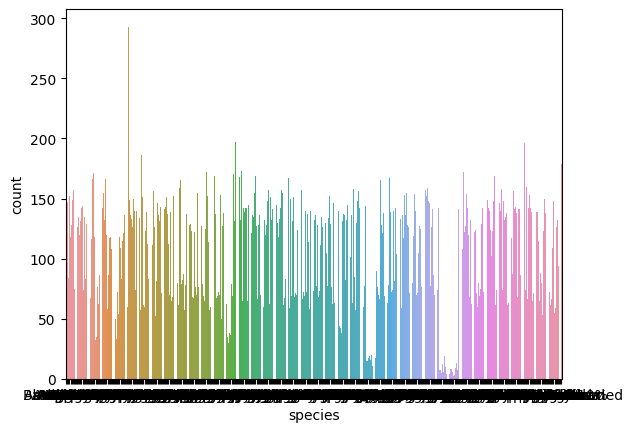

In [70]:
g1 = sns.barplot(countBySpecies, x="species", y="count")
g1

In [71]:
byT1 = df.groupby(["type1", "won"]).apply(lambda el: len(el)).reset_index(name="count").rename(columns={"type1":"type"})
byT2 = df.groupby(["type2", "won"]).apply(lambda el: len(el)).reset_index(name="count").rename(columns={"type2":"type"})
byT = pd.concat([byT1, byT2]).groupby(["type", "won"])["count"].apply(sum).reset_index()
byT

,type,won,count
0,Bug,False,1590
1,Bug,True,1520
2,Dark,False,1895
3,Dark,True,1755
4,Dragon,False,2559
5,Dragon,True,2712
6,Electric,False,1989
7,Electric,True,2117
8,Fairy,False,2086
9,Fairy,True,2123


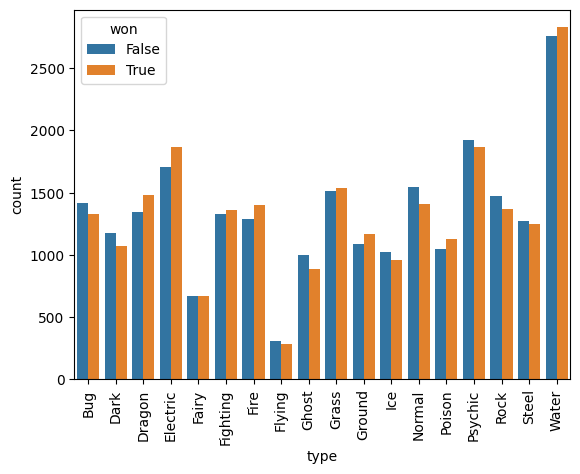

In [72]:
g2 = sns.barplot(byT1, x="type", y="count", hue="won")
plt.setp(g2.get_xticklabels(), rotation=90);

In [73]:
byTP = byT.pivot(index="type", columns="won", values="count").reset_index()
byTP.columns = byTP.columns.map(str)
byTP = byTP.rename(columns={"False":"lossCount", "True":"winCount"}).rename_axis(None, axis=1)
byTP["winRatio"] = byTP["winCount"]/(byTP["winCount"] + byTP["lossCount"])
byTP

,type,lossCount,winCount,winRatio
0,Bug,1590,1520,0.488746
1,Dark,1895,1755,0.480822
2,Dragon,2559,2712,0.514513
3,Electric,1989,2117,0.515587
4,Fairy,2086,2123,0.504395
5,Fighting,2275,2361,0.509275
6,Fire,1741,1893,0.520914
7,Flying,2954,2842,0.490338
8,Ghost,1878,1806,0.490228
9,Grass,1962,1967,0.500636


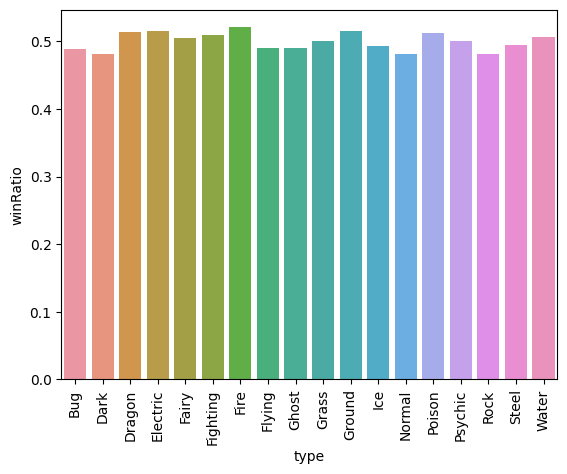

In [74]:
g3 = sns.barplot(byTP, x="type", y="winRatio")
plt.setp(g3.get_xticklabels(), rotation=90);
# g3.figure.savefig("figs/winByType.png")
plt.savefig("figs/winByType.png",bbox_inches='tight')


In [75]:
import re
def fun(x):
    x = x.lower()
    x  = re.sub('[^0-9a-zA-Z]+', '', x)
    return x



In [76]:
# df = df[df["strategy"]=="random"]

In [77]:
tmp = df.groupby(["species", "won"]).apply(lambda el: len(el)).reset_index(name="count")
winrateBySpeciesAI = tmp.pivot(index="species", columns="won", values="count").reset_index()
winrateBySpeciesAI.columns = winrateBySpeciesAI.columns.map(str)
winrateBySpeciesAI = winrateBySpeciesAI.rename(columns={"False":"lossCount", "True":"winCount"}).rename_axis(None, axis=1)
winrateBySpeciesAI["winRatio"] = winrateBySpeciesAI["winCount"]/(winrateBySpeciesAI["winCount"] + winrateBySpeciesAI["lossCount"])


winrateBySpeciesAI["speciesLower"] = winrateBySpeciesAI["species"].apply(fun)
winrateBySpeciesAI

,species,lossCount,winCount,winRatio,speciesLower
0,Abomasnow,30.0,32.0,0.516129,abomasnow
1,Absol,84.0,63.0,0.428571,absol
2,Accelgor,45.0,39.0,0.464286,accelgor
3,Aegislash,93.0,59.0,0.388158,aegislash
4,Aerodactyl,65.0,53.0,0.449153,aerodactyl
...,...,...,...,...,...
450,Zekrom,63.0,63.0,0.500000,zekrom
451,Zeraora,65.0,67.0,0.507576,zeraora
452,Zoroark,53.0,41.0,0.436170,zoroark
453,Zygarde,68.0,73.0,0.517730,zygarde


In [78]:
gen8df = pd.read_csv("gen8randombattle-1500.csv")
gen8df["speciesLower"] = gen8df["Pokemon"].apply(fun)
gen8df["Winrate"] = gen8df["Winrate"].apply(lambda x:x/100)
gen8df

,Rank,Pokemon,Deviations,Winrate,Games,Wins,speciesLower
0,1,Nihilego,7.021526,0.525154,19480,10230,nihilego
1,2,Mewtwo,6.463560,0.524205,17827,9345,mewtwo
2,3,Inteleon,6.325944,0.523320,18396,9627,inteleon
3,4,Blacephalon,6.324703,0.523096,18748,9807,blacephalon
4,5,Urshifu,6.255685,0.521862,20469,10682,urshifu
...,...,...,...,...,...,...,...
435,436,Clawitzer,6.587644,0.476990,20491,9774,clawitzer
436,437,Maractus,6.873110,0.466354,10432,4865,maractus
437,438,Indeedee,7.148806,0.475779,21779,10362,indeedee
438,439,Audino,7.152256,0.472703,17163,8113,audino


In [79]:
allW = winrateBySpeciesAI.merge(gen8df, on="speciesLower")
allW

,species,lossCount,winCount,winRatio,speciesLower,Rank,Pokemon,Deviations,Winrate,Games,Wins
0,Abomasnow,30.0,32.0,0.516129,abomasnow,280,Abomasnow,1.063614,0.494858,10696,5293
1,Absol,84.0,63.0,0.428571,absol,291,Absol,1.307022,0.495307,19390,9604
2,Accelgor,45.0,39.0,0.464286,accelgor,333,Accelgor,2.170156,0.489488,10654,5215
3,Aegislash,93.0,59.0,0.388158,aegislash,51,Aegislash,3.776870,0.513743,18883,9701
4,Aerodactyl,65.0,53.0,0.449153,aerodactyl,116,Aerodactyl,2.088374,0.507733,18234,9258
...,...,...,...,...,...,...,...,...,...,...,...
434,Zekrom,63.0,63.0,0.500000,zekrom,228,Zekrom,0.100630,0.499638,19354,9670
435,Zeraora,65.0,67.0,0.507576,zeraora,109,Zeraora,2.141853,0.507882,18459,9375
436,Zoroark,53.0,41.0,0.436170,zoroark,319,Zoroark,1.888839,0.492409,15479,7622
437,Zygarde,68.0,73.0,0.517730,zygarde,157,Zygarde,1.301818,0.504682,19331,9756


In [80]:
import numpy as np
player_winrates = allW["Winrate"]
ai_winrates = allW["winRatio"]
np.cov(player_winrates, ai_winrates)[0][1]

nan

In [81]:
allW[['Winrate','winRatio']].corr(method="spearman" )

,Winrate,winRatio
Winrate,1.000000,0.114021
winRatio,0.114021,1.000000


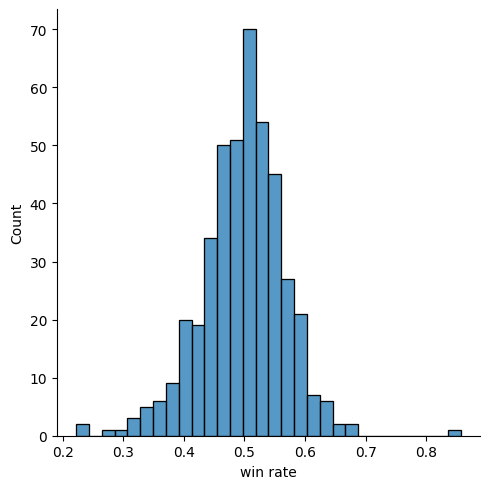

In [82]:
ax = sns.displot(allW, x="winRatio")
ax.set(xlabel='win rate')
ax.figure.savefig("figs/winDistrAI.png")

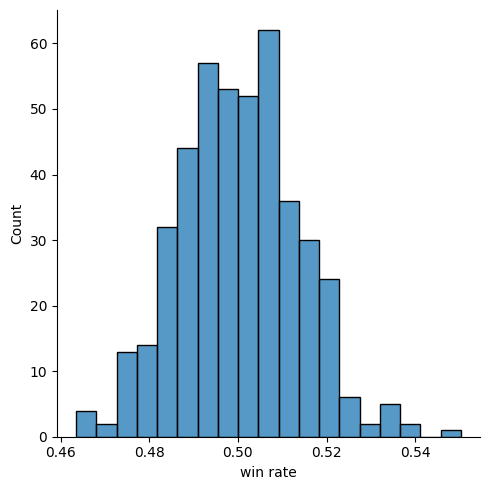

In [83]:
ax = sns.displot(allW, x="Winrate", )
ax.set(xlabel='win rate')
ax.figure.savefig("figs/winDistrPlayer.png")

In [84]:
winrateBySpeciesAI.sort_values(by=['winRatio'], ascending=False)

,species,lossCount,winCount,winRatio,speciesLower
359,Silvally-Water,1.0,6.0,0.857143,silvallywater
281,Pikachu-Sinnoh,2.0,9.0,0.818182,pikachusinnoh
72,Cramorant,20.0,40.0,0.666667,cramorant
345,Silvally-Dragon,4.0,8.0,0.666667,silvallydragon
321,Runerigus,24.0,46.0,0.657143,runerigus
...,...,...,...,...,...
358,Silvally-Steel,10.0,3.0,0.230769,silvallysteel
357,Silvally-Rock,7.0,2.0,0.222222,silvallyrock
349,Silvally-Fire,4.0,NaN,NaN,silvallyfire
350,Silvally-Flying,3.0,NaN,NaN,silvallyflying


In [85]:
gen8df.sort_values(by=['Winrate'], ascending=False)

,Rank,Pokemon,Deviations,Winrate,Games,Wins,speciesLower
59,60,SilvallyDragon,3.472793,0.550251,1194,657,silvallydragon
81,82,SilvallyGrass,2.724925,0.539496,1190,642,silvallygrass
89,90,SilvallyWater,2.532990,0.539122,1048,565,silvallywater
95,96,Silvally,2.334320,0.535849,1060,568,silvally
93,94,SilvallyElectric,2.391170,0.534864,1176,629,silvallyelectric
...,...,...,...,...,...,...,...
431,432,Sudowoodo,6.023040,0.470650,10528,4955,sudowoodo
434,435,Wobbuffet,6.429304,0.468056,10127,4740,wobbuffet
390,391,Calyrex,3.782869,0.467770,3444,1611,calyrex
436,437,Maractus,6.873110,0.466354,10432,4865,maractus
